# Etapas

### Etapa 1: Análise Exploratória de Dados
- 1.1: Realizar Importação de Dados e Primeira Análise
- 1.2: Verificar Valores Nulos

### Etapa 2: Preparação de Dados
- 2.1: Tratar Coluna 'category'
- 2.2: Criar Coluna Tags
- 2.3: Processar Coluna Tags
- 2.4: Remover Stop Words
- 2.5: Aplicar Steeming
- 2.6: Count Vectorizer

### Etapa 3: Construção de Modelo de Similaridade de Cosseno
- 3.1: Construir Modelo
- 3.2: Criar Algoritmo de Recomendações
- 3.3: Criar Sustema de Recomendações Alternativo

# Etapa 1: Análise Exploratória de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

### 1.1: Realizar Importação de Dados e Primeira Análise

In [2]:
amazon_df = pd.read_csv("amazon.csv")
amazon_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### 1.2: Verificar Valores Nulos

In [4]:
amazon_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# Etapa 2: Preparação de Dados

In [5]:
amazon_df_clean = amazon_df.copy()

### 2.1: Tratar Coluna "category"

In [6]:
amazon_df_clean['category'].head()

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

In [7]:
amazon_df_clean['category'] = amazon_df_clean['category'].str.replace('|', ' ')

In [8]:
amazon_df_clean.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories Accessories&Peripherals ...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories Accessories&Peripherals ...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories Accessories&Peripherals ...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories Accessories&Peripherals ...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
amazon_df_clean['category'][0]

'Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables'

### 2.2: Criar Coluna Tags

In [10]:
def criar_coluna_tags(dataframe, colunas):
    dataframe[colunas] = dataframe[colunas].astype(str)
    dataframe['tags'] = dataframe[colunas].agg(" ".join, axis=1)

In [11]:
criar_coluna_tags(amazon_df_clean, ['product_id', 'product_name', 'category', 'actual_price', 'rating', 'rating_count', 'about_product', 'review_title', 'review_content'])

In [12]:
amazon_df_clean['tags'].head()

0    B07JW9H4J1 Wayona Nylon Braided USB to Lightni...
1    B098NS6PVG Ambrane Unbreakable 60W / 3A Fast C...
2    B096MSW6CT Sounce Fast Phone Charging Cable & ...
3    B08HDJ86NZ boAt Deuce USB 300 2 in 1 Type-C & ...
4    B08CF3B7N1 Portronics Konnect L 1.2M Fast Char...
Name: tags, dtype: object

In [13]:
amazon_df_clean['tags'][0]

"B07JW9H4J1 Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables ₹1,099 4.2 24,269 High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding

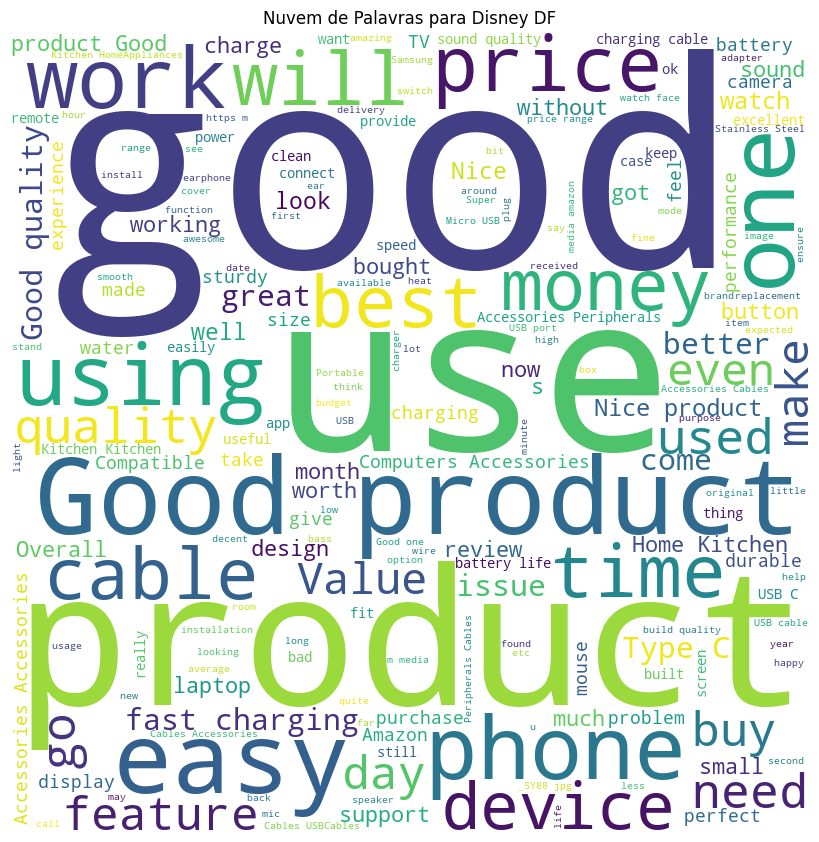

In [14]:
from wordcloud import WordCloud

# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(amazon_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

Essa é uma nuvem de palavras da coluna "tags" sem nenhum tipo de processamento. Como podemos observar, não existe padrão gramatical nas tags, além de existir diversas tags que não são muito relevantes nesse caso.

### 2.3: Processar Coluna Tags

In [15]:
def processar_tags(tags):
    # Remover URLs
    tags = re.sub(r"http\S+", "", tags)  # Remove qualquer coisa que comece com 'http' seguido de caracteres
    # Remover nan 
    tags = re.sub(r"\bnan\b", "", tags)
    # Substitui múltiplos espaços por um único espaço
    tags = re.sub(r'\s+', ' ', tags)
    # Converte o texto para minúsculas
    tags = tags.lower()
    return tags

In [16]:
def aplicar_processar_tags(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(processar_tags)

In [17]:
aplicar_processar_tags(amazon_df_clean, 'tags')

In [18]:
amazon_df_clean['tags'].head()

0    b07jw9h4j1 wayona nylon braided usb to lightni...
1    b098ns6pvg ambrane unbreakable 60w / 3a fast c...
2    b096msw6ct sounce fast phone charging cable & ...
3    b08hdj86nz boat deuce usb 300 2 in 1 type-c & ...
4    b08cf3b7n1 portronics konnect l 1.2m fast char...
Name: tags, dtype: object

In [19]:
amazon_df_clean['tags'][0]

"b07jw9h4j1 wayona nylon braided usb to lightning fast charging and data sync cable compatible for iphone 13, 12,11, x, 8, 7, 6, 5, ipad air, pro, mini (3 ft pack of 1, grey) computers&accessories accessories&peripherals cables&accessories cables usbcables ₹1,099 4.2 24,269 high compatibility : compatible with iphone 12, 11, x/xsmax/xr ,iphone 8/8 plus,iphone 7/7 plus,iphone 6s/6s plus,iphone 6/6 plus,iphone 5/5s/5c/se,ipad pro,ipad air 1/2,ipad mini 1/2/3,ipod nano7,ipod touch and more apple devices.|fast charge&data sync : it can charge and sync simultaneously at a rapid speed, compatible with any charging adaptor, multi-port charging station or power bank.|durability : durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|high security level : it is designed to fully protect your device from damaging excessive current.copper core thick+multilayer shielding

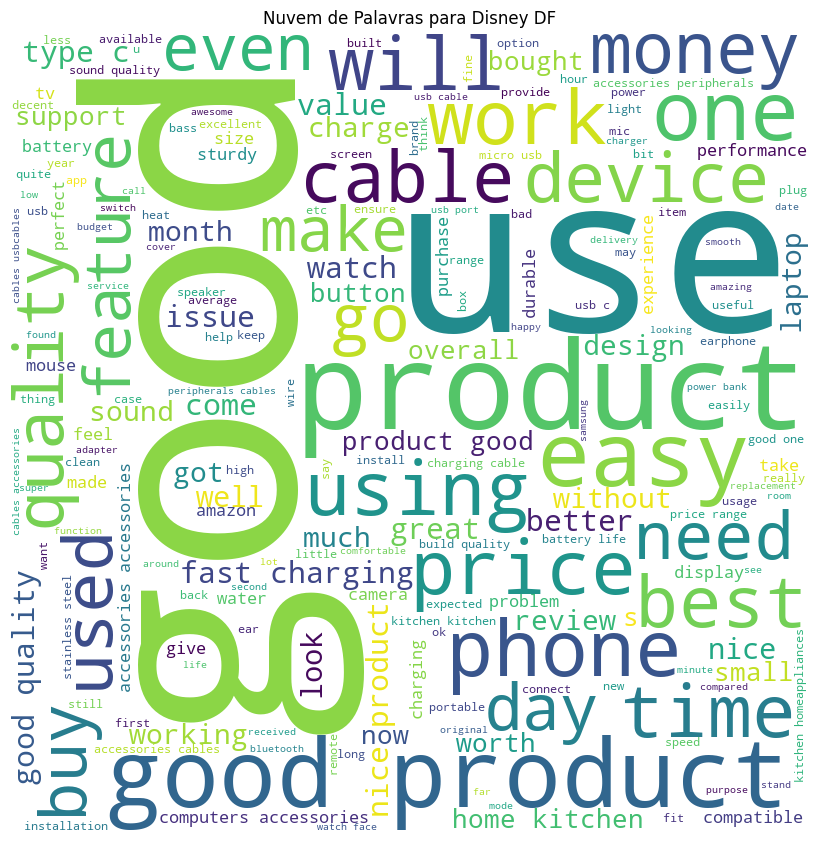

In [20]:
from wordcloud import WordCloud

# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(amazon_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

# Etapa 3: Construção de Modelo de Similaridade de Cosseno

### 3.1: Construir Modelo

In [21]:
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import Dataset, DataLoader

# Carregar o modelo BERT e o tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

class AmazonTagsDataset(Dataset):
    def __init__(self, tags):
        # Tokenizar as tags e armazenar os encodings
        self.encodings = tokenizer(tags, truncation=True, padding=True, max_length=512, return_tensors='pt')
    
    def __getitem__(self, idx):
        # Retornar os encodings para o índice fornecido
        return {key: val[idx] for key, val in self.encodings.items()}
    
    def __len__(self):
        # Retornar o número total de itens
        return len(self.encodings['input_ids'])

# Criar o dataset
dataset = AmazonTagsDataset(amazon_df_clean['tags'].tolist())
data_loader = DataLoader(dataset, batch_size=16, shuffle=False)

c:\Users\yamas\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
embeddings = []

# Desativar o cálculo de gradiente para economizar memória
model.eval()
with torch.no_grad():
    for batch in data_loader:
        inputs = {key: val.to(model.device) for key, val in batch.items()}
        outputs = model(**inputs)
        # Usar a média dos embeddings de todas as camadas ocultas
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings.cpu())

# Concatenar todos os embeddings em uma matriz
embeddings_matrix = torch.cat(embeddings).numpy()

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular a matriz de similaridade de cosseno
similarity = cosine_similarity(embeddings_matrix)

### 3.2: Criar Sistema de Recomendações

In [24]:
def recomendar(product_id):
    index = amazon_df[amazon_df['product_id'] == product_id].index[0]
    print("Searched Item:")
    print(amazon_df.iloc[index].product_name)
    
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    print("\nRecommendations:")
    for i in distances[1:11]:
        print(amazon_df.iloc[i[0]].product_name)

In [25]:
recomendar('B0BBLHTRM9')

Searched Item:
IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1

Recommendations:
IONIX Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water | Tap filter Multilayer | Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1
Aqua d pure Active Copper 12-L RO+UV Water Filter Purifier for Home, Kitchen Fully Automatic UF+TDS Controller
AVNISH Tap Water Purifier Filter Faucet 6 Layer Carbon Activated Dust Chlorine Remover Water Softener for Drinking Cartridge Alkaline Taps for Kitchen Sink Bathroom Wash Basin (6-Layer Filtration)
Philips EasySpeed Plus Steam Iron GC2147/30-2400W, Quick Heat up with up to 30 g/min steam, 150g steam Boost, Scratch Resistant Ceramic Soleplate, Vertical steam, Drip-Stop
INDIAS®™ Electro-Instant Water Geyser A.B.S. Body Shock Proof Can be Used in Bathroom, Kitchen, wash Area, Hotels, H

In [26]:
recomendar('B0B3XXSB1K')

Searched Item:
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black)

Recommendations:
LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LQ576BPSA (Ceramic Black)
VU 138 cm (55 inches) Premium Series 4K Ultra HD Smart IPS LED TV 55UT (Black)
MI 80 cm (32 inches) HD Ready Smart Android LED TV 5A Pro | L32M7-EAIN (Black)
Hisense 108 cm (43 inches) 4K Ultra HD Smart Certified Android LED TV 43A6GE (Black)
Hisense 126 cm (50 inches) Bezelless Series 4K Ultra HD Smart LED Google TV 50A6H (Black)
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black)
Redmi 108 cm (43 inches) 4K Ultra HD Android Smart LED TV X43 | L43R7-7AIN (Black)
Toshiba 108 cm (43 inches) V Series Full HD Smart Android LED TV 43V35KP (Silver)
VU 139 cm (55 inches) The GloLED Series 4K Smart LED Google TV 55GloLED (Grey)


### 3.3: Criar Sistema de Recomendações Alternativo

In [27]:
from fuzzywuzzy import process

def recomendar_por_titulo_alternativo(titulo_parcial):
    titulo_parcial = titulo_parcial.lower()  # Padroniza o título inserido
    # Cria uma lista com os títulos do dataframe
    titles = amazon_df['product_name'].tolist()

    # Encontra o título mais próximo usando fuzzywuzzy
    best_match, score = process.extractOne(titulo_parcial, titles)

    # Se o score for alto o suficiente (exemplo, 50 ou mais), pega o índice do produto
    if score > 50:
        matching_produtos = amazon_df[amazon_df['product_name'] == best_match]
        index = matching_produtos.index[0]
        distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        
        print("Item Pesquisado:")
        print(amazon_df.iloc[index].product_name)
        print("\nRecomendações:")
        
        for i in distances[1:11]:  # Exibir os 10 produtos mais similares
            print(amazon_df.iloc[i[0]].product_name)
    else:
        print("Nenhum produto encontrado com um bom grau de correspondência.")


c:\Users\yamas\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [28]:
recomendar_por_titulo_alternativo('lg 108 cm (43 inches)')

Item Pesquisado:
LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)

Recomendações:
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black)
VU 138 cm (55 inches) Premium Series 4K Ultra HD Smart IPS LED TV 55UT (Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LQ576BPSA (Ceramic Black)
MI 80 cm (32 inches) HD Ready Smart Android LED TV 5A Pro | L32M7-EAIN (Black)
Hisense 126 cm (50 inches) Bezelless Series 4K Ultra HD Smart LED Google TV 50A6H (Black)
Hisense 108 cm (43 inches) 4K Ultra HD Smart Certified Android LED TV 43A6GE (Black)
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black)
Redmi 108 cm (43 inches) 4K Ultra HD Android Smart LED TV X43 | L43R7-7AIN (Black)
Toshiba 108 cm (43 inches) V Series Full HD Smart Android LED TV 43V35KP (Silver)
VU 139 cm (55 inches) The GloLED Series 4K Smart LED Google TV 55GloLED (Grey)


In [29]:
recomendar_por_titulo_alternativo('IONIX tap filter Multilayer')

Item Pesquisado:
IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1

Recomendações:
IONIX Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water | Tap filter Multilayer | Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1
Aqua d pure Active Copper 12-L RO+UV Water Filter Purifier for Home, Kitchen Fully Automatic UF+TDS Controller
AVNISH Tap Water Purifier Filter Faucet 6 Layer Carbon Activated Dust Chlorine Remover Water Softener for Drinking Cartridge Alkaline Taps for Kitchen Sink Bathroom Wash Basin (6-Layer Filtration)
Philips EasySpeed Plus Steam Iron GC2147/30-2400W, Quick Heat up with up to 30 g/min steam, 150g steam Boost, Scratch Resistant Ceramic Soleplate, Vertical steam, Drip-Stop
INDIAS®™ Electro-Instant Water Geyser A.B.S. Body Shock Proof Can be Used in Bathroom, Kitchen, wash Area, Hotels, H